In [1]:
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras.datasets import fashion_mnist
from emnist import extract_training_samples
from tensorflow.keras import *
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import sys
import os
import json

sys.path.insert(1, os.path.join(sys.path[0], '../../..'))

from utils import *
# tf.compat.v1.enable_eager_execution()
%matplotlib inline
%config Completer.use_jedi = False

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

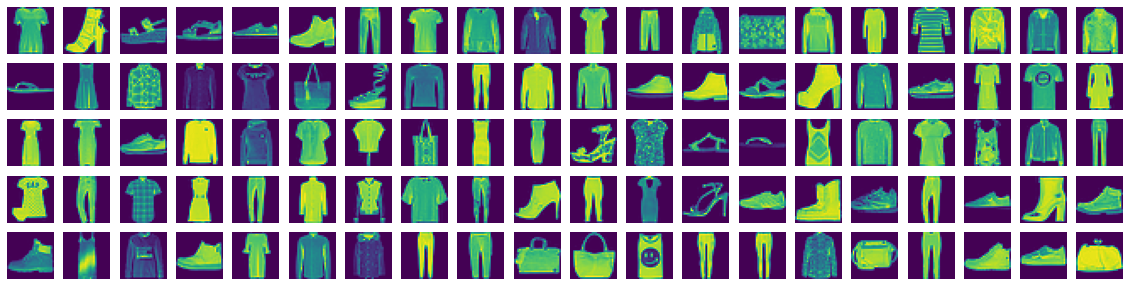

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
show_dataset(x_train)

In [3]:
num_classes = 10 

mean = np.mean(x_train,axis=(0, 1, 2))
std = np.std(x_train, axis=(0, 1, 2))

x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

y_train = utils.to_categorical(y_train, num_classes) 
y_test = utils.to_categorical(y_test, num_classes) 

In [4]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
results = {}

# Train BNN

In [7]:
import tensorflow as tf
import larq as lq

kwargs = dict(input_quantizer="ste_sign",
              kernel_quantizer="ste_sign",
              kernel_constraint="weight_clip",
              use_bias=False)
 
model = tf.keras.models.Sequential([
    lq.layers.QuantConv2D(32, 3,
                          kernel_quantizer="ste_sign",
                          kernel_constraint="weight_clip",
                          use_bias=False,
                          input_shape=(28, 28, 1)),
    tf.keras.layers.Activation("elu"),
    tf.keras.layers.BatchNormalization(),
    
    lq.layers.QuantConv2D(32, 3, padding="same", **kwargs),
    tf.keras.layers.Activation("elu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
#     tf.keras.layers.Dropout(0.4),
 
    lq.layers.QuantConv2D(64, 3, padding="same", **kwargs),
    tf.keras.layers.Activation("elu"),
    tf.keras.layers.BatchNormalization(),
    
    lq.layers.QuantConv2D(64, 3, padding="same", **kwargs),
    tf.keras.layers.Activation("elu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
#     tf.keras.layers.Dropout(0.4),
 
    lq.layers.QuantConv2D(128, 3, padding="same", **kwargs),
    tf.keras.layers.Activation("elu"),
    tf.keras.layers.BatchNormalization(),
    
    lq.layers.QuantConv2D(128, 3, padding="same", **kwargs),
    tf.keras.layers.Activation("elu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
#     tf.keras.layers.Dropout(0.4),
    
    
    tf.keras.layers.Flatten(),
 
    lq.layers.QuantDense(128, **kwargs),
    tf.keras.layers.Activation("elu"),
    tf.keras.layers.BatchNormalization(),

 
    lq.layers.QuantDense(10, **kwargs),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("softmax")
])

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
# model = tf.keras.models.load_model("vanilla_cifar10_bnn.h5")

In [10]:
history = model.fit(x_train, y_train, batch_size=256, epochs=150, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - ETA: 0s - loss: 0.9292 - accuracy: 0.7223

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 10s 173us/sample - loss: 0.9292 - accuracy: 0.7223 - val_loss: 0.7493 - val_accuracy: 0.7643
Epoch 2/150
60000/60000 [==============================] - 7s 111us/sample - loss: 0.6090 - accuracy: 0.8220 - val_loss: 0.5977 - val_accuracy: 0.8140
Epoch 3/150
60000/60000 [==============================] - 7s 111us/sample - loss: 0.5145 - accuracy: 0.8414 - val_loss: 0.4952 - val_accuracy: 0.8421
Epoch 4/150
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4464 - accuracy: 0.8592 - val_loss: 0.4655 - val_accuracy: 0.8445
Epoch 5/150
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4090 - accuracy: 0.8685 - val_loss: 0.4471 - val_accuracy: 0.8495
Epoch 6/150
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3820 - accuracy: 0.8740 - val_loss: 0.4127 - val_accuracy: 0.8613
Epoch 7/150
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3572 - accuracy: 0.8

60000/60000 [==============================] - 7s 113us/sample - loss: 0.1852 - accuracy: 0.9326 - val_loss: 0.2762 - val_accuracy: 0.9031
Epoch 56/150
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1819 - accuracy: 0.9343 - val_loss: 0.4103 - val_accuracy: 0.8587
Epoch 57/150
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1848 - accuracy: 0.9336 - val_loss: 0.2917 - val_accuracy: 0.9026
Epoch 58/150
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1841 - accuracy: 0.9334 - val_loss: 0.3255 - val_accuracy: 0.8899
Epoch 59/150
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1844 - accuracy: 0.9323 - val_loss: 0.2737 - val_accuracy: 0.9059
Epoch 60/150
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1835 - accuracy: 0.9324 - val_loss: 0.3533 - val_accuracy: 0.8806
Epoch 61/150
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1786 - accuracy

Epoch 109/150
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1589 - accuracy: 0.9415 - val_loss: 0.3472 - val_accuracy: 0.8863
Epoch 110/150
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1571 - accuracy: 0.9420 - val_loss: 0.2951 - val_accuracy: 0.9039
Epoch 111/150
60000/60000 [==============================] - 7s 112us/sample - loss: 0.1592 - accuracy: 0.9414 - val_loss: 0.2985 - val_accuracy: 0.9017
Epoch 112/150
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1555 - accuracy: 0.9428 - val_loss: 0.5726 - val_accuracy: 0.8117
Epoch 113/150
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1534 - accuracy: 0.9430 - val_loss: 0.3031 - val_accuracy: 0.8993
Epoch 114/150
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1571 - accuracy: 0.9430 - val_loss: 0.3183 - val_accuracy: 0.8936
Epoch 115/150
60000/60000 [==============================] - 7s 113us/sample - los

In [11]:
model.save('vanilla_fashion_bnn.h5')

In [12]:
lq.models.summary(model)

+sequential stats------------------------------------------------------------------------------------------+
| Layer                  Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                              (bit)                        x 1       x 1    (kB)                          |
+----------------------------------------------------------------------------------------------------------+
| quant_conv2d                     -  (-1, 26, 26, 32)      288         0    0.04           0       194688 |
| activation                       -  (-1, 26, 26, 32)        0         0       0           ?            ? |
| batch_normalization              -  (-1, 26, 26, 32)        0        64    0.25           0            0 |
| quant_conv2d_1                   1  (-1, 26, 26, 32)     9216         0    1.12     6230016            0 |
| activation_1                     -  (-1, 26, 26, 32)        0         0       0           ?            ? |
| batch_normalizati

In [13]:
lq.models.ModelProfile(model).generate_table()[-1][-3]

57.64453125

In [14]:
full_evaluate(y=y_test, X=x_test, model=model)

{'accuracy_score': 0.9097,
 'f1_score_macro': 0.9094184638795462,
 'f1_score_weighted': 0.9099815361204537}

In [15]:
results = {}

In [16]:
results['base'] = full_evaluate(model, x_test, y_test)
results['base']['size (kb)'] = lq.models.ModelProfile(model).generate_table()[-1][-3]
results['base']['params'] = model.count_params()

# BNN + prunning

In [17]:
# model.layers[7].__class__ == lq.layers.QuantConv2D

In [18]:
# for i, l in enumerate(model.layers):
#     if l.__class__ == lq.layers.QuantConv2D:
#         model.layers[i].__class__ = tf.keras.layers.Conv2D
#     if l.__class__ == lq.layers.QuantDense:
#         model.layers[i].__class__ = tf.keras.layers.Dense

In [19]:
# from tensorflow.python.framework.ops import disable_eager_execution

# disable_eager_execution()

In [20]:
model_tmp = model
# acc = []
# par_count =[]
# models = [model_tmp]
model_tmp.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# model_tmp = prune_model(model_tmp, 0.28, opt='adam', method='l1')
# model_tmp.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test, y_test), verbose=1)

for i in range(15):
#     for i, l in enumerate(model_tmp.layers):
#         if l.__class__ == lq.layers.QuantConv2D:
#             model_tmp.layers[i].__class__ = tf.keras.layers.Conv2D
#         if l.__class__ == lq.layers.QuantDense:
#             model_tmp.layers[i].__class__ = tf.keras.layers.Dense
    try:
        model_tmp = prune_model(model_tmp, 0.1, opt='adam', method='l1')
    except:
        break
#     for i, l in enumerate(model_tmp.layers):
#         if l.__class__ == tf.keras.layers.Conv2D:
#             model_tmp.layers[i].__class__ = lq.layers.QuantConv2D
#         if l.__class__ == tf.keras.layers.Dense:
#             model_tmp.layers[i].__class__ = lq.layers.QuantDense
    model_tmp.fit(x_train, y_train, batch_size=256, epochs=15, validation_data=(x_test, y_test), verbose=1)
    results['bnn_node_pruning_{}'.format((0.9)**(i+1))] = full_evaluate(model_tmp, x_test, y_test)
    results['bnn_node_pruning_{}'.format((0.9)**(i+1))]['params'] = model_tmp.count_params()
    results['bnn_node_pruning_{}'.format((0.9)**(i+1))]['size (kb)'] = lq.models.ModelProfile(model_tmp).generate_table()[-1][-3]
    with open('results_bnn.json', 'w', encoding ='utf8') as json_file:
        json.dump(results, json_file, ensure_ascii = True)

44
Deleting 44/128 channels from layer: quant_conv2d_5
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - ETA: 0s - loss: 0.1695 - accuracy: 0.9376

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 8s 133us/sample - loss: 0.1695 - accuracy: 0.9376 - val_loss: 0.3265 - val_accuracy: 0.8960
Epoch 2/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1659 - accuracy: 0.9394 - val_loss: 0.2892 - val_accuracy: 0.9043
Epoch 3/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1653 - accuracy: 0.9392 - val_loss: 0.2975 - val_accuracy: 0.9008
Epoch 4/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1649 - accuracy: 0.9398 - val_loss: 0.3217 - val_accuracy: 0.8946
Epoch 5/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1637 - accuracy: 0.9402 - val_loss: 0.3225 - val_accuracy: 0.8903
Epoch 6/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1612 - accuracy: 0.9406 - val_loss: 0.3335 - val_accuracy: 0.8916
Epoch 7/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1649 - accuracy: 0.9387 - v

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 8s 138us/sample - loss: 0.2084 - accuracy: 0.9242 - val_loss: 0.7452 - val_accuracy: 0.7784
Epoch 2/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1975 - accuracy: 0.9277 - val_loss: 0.3097 - val_accuracy: 0.8946
Epoch 3/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1956 - accuracy: 0.9290 - val_loss: 0.3208 - val_accuracy: 0.8886
Epoch 4/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1949 - accuracy: 0.9280 - val_loss: 0.3138 - val_accuracy: 0.8924
Epoch 5/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1940 - accuracy: 0.9297 - val_loss: 0.3045 - val_accuracy: 0.9005
Epoch 6/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1886 - accuracy: 0.9308 - val_loss: 0.3010 - val_accuracy: 0.8980
Epoch 7/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1874 - accuracy: 0.9312 - v

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 9s 142us/sample - loss: 0.3084 - accuracy: 0.8899 - val_loss: 0.5457 - val_accuracy: 0.8146
Epoch 2/15
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2778 - accuracy: 0.8998 - val_loss: 0.3548 - val_accuracy: 0.8785
Epoch 3/15
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2713 - accuracy: 0.9021 - val_loss: 0.3367 - val_accuracy: 0.8800
Epoch 4/15
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2625 - accuracy: 0.9047 - val_loss: 0.3409 - val_accuracy: 0.8796
Epoch 5/15
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2642 - accuracy: 0.9050 - val_loss: 0.3331 - val_accuracy: 0.8846
Epoch 6/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2583 - accuracy: 0.9072 - val_loss: 0.3318 - val_accuracy: 0.8860
Epoch 7/15
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2555 - accuracy: 0.9072 - v

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 9s 148us/sample - loss: 0.2768 - accuracy: 0.9012 - val_loss: 0.3475 - val_accuracy: 0.8784
Epoch 2/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2697 - accuracy: 0.9023 - val_loss: 0.3459 - val_accuracy: 0.8792
Epoch 3/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2680 - accuracy: 0.9042 - val_loss: 0.3528 - val_accuracy: 0.8761
Epoch 4/15
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2665 - accuracy: 0.9043 - val_loss: 0.3321 - val_accuracy: 0.8858
Epoch 5/15
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2641 - accuracy: 0.9046 - val_loss: 0.3355 - val_accuracy: 0.8839
Epoch 6/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2608 - accuracy: 0.9064 - val_loss: 0.4110 - val_accuracy: 0.8529
Epoch 7/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2578 - accuracy: 0.9072 - v

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 9s 155us/sample - loss: 0.2725 - accuracy: 0.9011 - val_loss: 0.3372 - val_accuracy: 0.8818
Epoch 2/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2725 - accuracy: 0.9010 - val_loss: 0.4471 - val_accuracy: 0.8476
Epoch 3/15
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2684 - accuracy: 0.9030 - val_loss: 0.3332 - val_accuracy: 0.8823
Epoch 4/15
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2702 - accuracy: 0.9048 - val_loss: 0.3380 - val_accuracy: 0.8829
Epoch 5/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2650 - accuracy: 0.9041 - val_loss: 0.3364 - val_accuracy: 0.8797
Epoch 6/15
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2662 - accuracy: 0.9039 - val_loss: 0.3204 - val_accuracy: 0.8862
Epoch 7/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2651 - accuracy: 0.9044 - v

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 9s 158us/sample - loss: 0.2906 - accuracy: 0.8947 - val_loss: 0.3670 - val_accuracy: 0.8731
Epoch 2/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2786 - accuracy: 0.8998 - val_loss: 0.7453 - val_accuracy: 0.7630
Epoch 3/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2801 - accuracy: 0.8983 - val_loss: 0.3310 - val_accuracy: 0.8805
Epoch 4/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2798 - accuracy: 0.8988 - val_loss: 0.3285 - val_accuracy: 0.8858
Epoch 5/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2790 - accuracy: 0.8992 - val_loss: 0.3444 - val_accuracy: 0.8744
Epoch 6/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2733 - accuracy: 0.9020 - val_loss: 0.3244 - val_accuracy: 0.8872
Epoch 7/15
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2761 - accuracy: 0.8999 - v

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 10s 164us/sample - loss: 0.3079 - accuracy: 0.8886 - val_loss: 0.3736 - val_accuracy: 0.8677
Epoch 2/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3011 - accuracy: 0.8911 - val_loss: 0.3396 - val_accuracy: 0.8759
Epoch 3/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2962 - accuracy: 0.8930 - val_loss: 0.3586 - val_accuracy: 0.8731
Epoch 4/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2954 - accuracy: 0.8940 - val_loss: 0.4023 - val_accuracy: 0.8543
Epoch 5/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2947 - accuracy: 0.8939 - val_loss: 0.3354 - val_accuracy: 0.8791
Epoch 6/15
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2894 - accuracy: 0.8962 - val_loss: 0.5265 - val_accuracy: 0.8152
Epoch 7/15
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2934 - accuracy: 0.8937 - 

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 10s 162us/sample - loss: 0.3456 - accuracy: 0.8755 - val_loss: 0.3761 - val_accuracy: 0.8690
Epoch 2/15
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3359 - accuracy: 0.8787 - val_loss: 0.8635 - val_accuracy: 0.7245
Epoch 3/15
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3295 - accuracy: 0.8807 - val_loss: 0.3830 - val_accuracy: 0.8637
Epoch 4/15
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3316 - accuracy: 0.8806 - val_loss: 0.3659 - val_accuracy: 0.8682
Epoch 5/15
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3284 - accuracy: 0.8807 - val_loss: 0.6846 - val_accuracy: 0.7790
Epoch 6/15
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3315 - accuracy: 0.8806 - val_loss: 0.4706 - val_accuracy: 0.8344
Epoch 7/15
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3251 - accuracy: 0.8810 - 

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 10s 170us/sample - loss: 0.3923 - accuracy: 0.8561 - val_loss: 0.7882 - val_accuracy: 0.7289
Epoch 2/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3784 - accuracy: 0.8624 - val_loss: 0.4640 - val_accuracy: 0.8324
Epoch 3/15
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3706 - accuracy: 0.8644 - val_loss: 0.7889 - val_accuracy: 0.7364
Epoch 4/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3666 - accuracy: 0.8670 - val_loss: 0.4290 - val_accuracy: 0.8423
Epoch 5/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3688 - accuracy: 0.8662 - val_loss: 0.6892 - val_accuracy: 0.7655
Epoch 6/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3635 - accuracy: 0.8684 - val_loss: 0.3852 - val_accuracy: 0.8592
Epoch 7/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3596 - accuracy: 0.8691 - 

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 11s 179us/sample - loss: 0.3699 - accuracy: 0.8647 - val_loss: 0.3949 - val_accuracy: 0.8583
Epoch 2/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3638 - accuracy: 0.8678 - val_loss: 0.4285 - val_accuracy: 0.8466
Epoch 3/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3660 - accuracy: 0.8673 - val_loss: 0.4048 - val_accuracy: 0.8561
Epoch 4/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3661 - accuracy: 0.8667 - val_loss: 0.4187 - val_accuracy: 0.8481
Epoch 5/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3608 - accuracy: 0.8694 - val_loss: 0.4388 - val_accuracy: 0.8454
Epoch 6/15
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3599 - accuracy: 0.8695 - val_loss: 0.3925 - val_accuracy: 0.8576
Epoch 7/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3592 - accuracy: 0.8697 - 

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 11s 185us/sample - loss: 0.3944 - accuracy: 0.8560 - val_loss: 0.4263 - val_accuracy: 0.8436
Epoch 2/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3806 - accuracy: 0.8605 - val_loss: 0.4380 - val_accuracy: 0.8387
Epoch 3/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3780 - accuracy: 0.8620 - val_loss: 0.4060 - val_accuracy: 0.8508
Epoch 4/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3802 - accuracy: 0.8607 - val_loss: 0.4020 - val_accuracy: 0.8575
Epoch 5/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3770 - accuracy: 0.8621 - val_loss: 0.4033 - val_accuracy: 0.8518
Epoch 6/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3754 - accuracy: 0.8630 - val_loss: 0.4220 - val_accuracy: 0.8501
Epoch 7/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3761 - accuracy: 0.8629 - 

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 11s 188us/sample - loss: 0.3944 - accuracy: 0.8571 - val_loss: 0.4425 - val_accuracy: 0.8368
Epoch 2/15
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3884 - accuracy: 0.8581 - val_loss: 0.4314 - val_accuracy: 0.8402
Epoch 3/15
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3873 - accuracy: 0.8596 - val_loss: 0.4419 - val_accuracy: 0.8371
Epoch 4/15
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3834 - accuracy: 0.8608 - val_loss: 0.4675 - val_accuracy: 0.8315
Epoch 5/15
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3864 - accuracy: 0.8583 - val_loss: 0.4185 - val_accuracy: 0.8457
Epoch 6/15
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3829 - accuracy: 0.8601 - val_loss: 0.4244 - val_accuracy: 0.8440
Epoch 7/15
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3836 - accuracy: 0.8599 - 

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 11s 188us/sample - loss: 0.4235 - accuracy: 0.8442 - val_loss: 0.4714 - val_accuracy: 0.8282
Epoch 2/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4150 - accuracy: 0.8466 - val_loss: 0.4646 - val_accuracy: 0.8253
Epoch 3/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4080 - accuracy: 0.8505 - val_loss: 0.4367 - val_accuracy: 0.8405
Epoch 4/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4148 - accuracy: 0.8473 - val_loss: 0.4376 - val_accuracy: 0.8375
Epoch 5/15
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4142 - accuracy: 0.8471 - val_loss: 0.4447 - val_accuracy: 0.8405
Epoch 6/15
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4082 - accuracy: 0.8494 - val_loss: 0.4528 - val_accuracy: 0.8391
Epoch 7/15
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4119 - accuracy: 0.8494 - 

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 12s 200us/sample - loss: 0.4758 - accuracy: 0.8249 - val_loss: 0.5029 - val_accuracy: 0.8180
Epoch 2/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4521 - accuracy: 0.8333 - val_loss: 0.7669 - val_accuracy: 0.7347
Epoch 3/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4535 - accuracy: 0.8329 - val_loss: 0.7983 - val_accuracy: 0.7055
Epoch 4/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4499 - accuracy: 0.8341 - val_loss: 0.4702 - val_accuracy: 0.8267
Epoch 5/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4454 - accuracy: 0.8358 - val_loss: 0.5592 - val_accuracy: 0.7946
Epoch 6/15
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4433 - accuracy: 0.8375 - val_loss: 0.4618 - val_accuracy: 0.8326
Epoch 7/15
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4392 - accuracy: 0.8378 - 

/home/mdobrzanski/anaconda3/envs/iet_env_um/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 12s 200us/sample - loss: 0.5059 - accuracy: 0.8120 - val_loss: 0.6774 - val_accuracy: 0.7541
Epoch 2/15
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4919 - accuracy: 0.8197 - val_loss: 0.5060 - val_accuracy: 0.8102
Epoch 3/15
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4800 - accuracy: 0.8221 - val_loss: 0.5007 - val_accuracy: 0.8147
Epoch 4/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4778 - accuracy: 0.8230 - val_loss: 1.5288 - val_accuracy: 0.5406
Epoch 5/15
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4721 - accuracy: 0.8241 - val_loss: 1.2639 - val_accuracy: 0.5800
Epoch 6/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4728 - accuracy: 0.8249 - val_loss: 1.0395 - val_accuracy: 0.6544
Epoch 7/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4718 - accuracy: 0.8256 - 

In [21]:
model_tmp.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
quant_conv2d_input (InputLay [(None, 28, 28, 1)]       0         
_________________________________________________________________
quant_conv2d (QuantConv2D)   (None, 26, 26, 32)        288       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
quant_conv2d_1 (QuantConv2D) (None, 26, 26, 16)        4608      
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64 

In [22]:
lq.models.summary(model_tmp)

+model_14 stats--------------------------------------------------------------------------------------------+
| Layer                  Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                              (bit)                        x 1       x 1    (kB)                          |
+----------------------------------------------------------------------------------------------------------+
| quant_conv2d_input               -   (-1, 28, 28, 1)        0         0       0           ?            ? |
| quant_conv2d                     -  (-1, 26, 26, 32)      288         0    0.04           0       194688 |
| activation                       -  (-1, 26, 26, 32)        0         0       0           ?            ? |
| batch_normalization              -  (-1, 26, 26, 32)        0        64    0.25           0            0 |
| quant_conv2d_1                   1  (-1, 26, 26, 16)     4608         0    0.56     3115008            0 |
| activation_1     